In [23]:
from utils.load_data import load_behavioral_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
from scipy.optimize import curve_fit

# Define the function
def sigmoid_like(x, alpha, beta):
    return 1 / (1 + alpha * np.exp(beta * x))
def fit_sigmoid(x_data, y_data):
    # Fit the sigmoid function to the data
    params, covariance = curve_fit(sigmoid_like, x_data, y_data, p0=[1, 1])  # Initial guess for alpha and beta
    return params

In [37]:
data = load_behavioral_data(min_RT = 0.001)
data["diff"] = np.log(data["gain"] / data["loss"])
data["prob_accept"] = data["response_int"].replace({1: 0, 2: 1/3, 3: 2/3, 4: 1})

In [70]:
# Create a new column called trial quantile, where its split into 16 evently spaced quantiles based on trial
data["trial_quantile"] = pd.qcut(data["trial"], 16, labels=False)

In [78]:
equalRange = data.query("condition == 'equalRange'")
equalRange = equalRange.groupby(["gain", "loss", "trial_quantile"])[["prob_accept", "RT"]].mean().reset_index()
equalRange["sub"] = 1
equalIndifference = data.query("condition == 'equalIndifference'")
equalIndifference = equalIndifference.groupby(["gain", "loss", "trial_quantile"])[["prob_accept", "RT"]].mean().reset_index()
equalIndifference["sub"] = 2

In [79]:
equalRange["diff"] = np.log(equalRange["gain"] / equalRange["loss"])
equalIndifference["diff"] = np.log(equalIndifference["gain"] / equalIndifference["loss"])

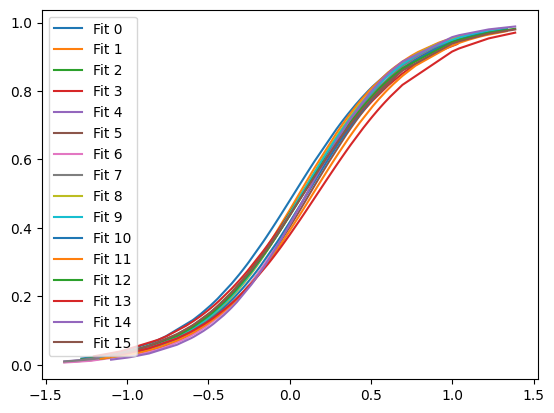

In [81]:
params_run1 = []
for run in np.sort(equalRange["trial_quantile"].unique()):
    run_data = equalRange.query("trial_quantile == @run")
    params = fit_sigmoid(run_data["diff"], run_data["prob_accept"])
    # plt.scatter(run_data["diff"], run_data["accept"], label=f"Run {run}")
    plt.plot(run_data["diff"].sort_values(), sigmoid_like(run_data["diff"].sort_values(), *params), label=f"Fit {run}")
    params_run1.append(params)
plt.legend()
plt.show()

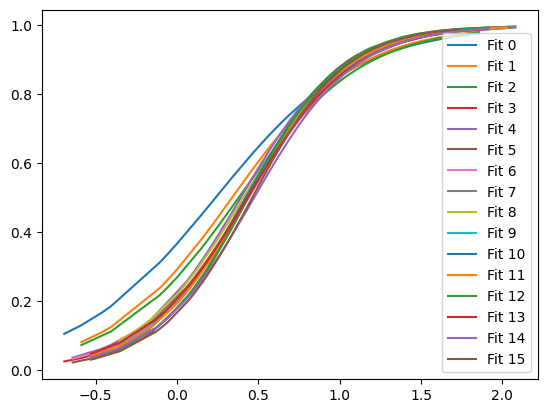

In [82]:
params_run2 = []
for run in np.sort(equalIndifference["trial_quantile"].unique()):
    run_data = equalIndifference.query("trial_quantile == @run")
    params = fit_sigmoid(run_data["diff"], run_data["prob_accept"])
    # plt.scatter(run_data["diff"], run_data["accept"], label=f"Run {run}")
    plt.plot(run_data["diff"].sort_values(), sigmoid_like(run_data["diff"].sort_values(), *params), label=f"Fit {run}")
    params_run2.append(params)
plt.legend()
plt.show()

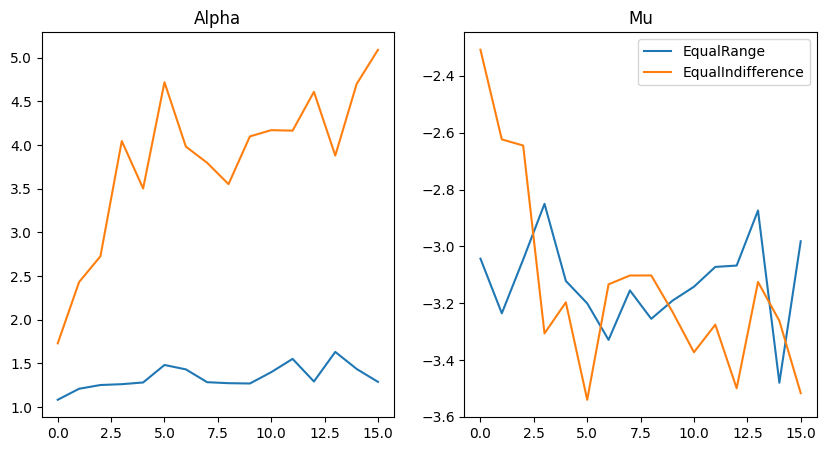

In [86]:
params_run1 = np.array(params_run1)
params_run2 = np.array(params_run2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(params_run1[:, 0], label="EqualRange")
plt.plot(params_run2[:, 0], label="EqualIndifference")
plt.title("Alpha")
plt.subplot(1, 2, 2)
plt.plot(params_run1[:, 1], label="EqualRange")
plt.plot(params_run2[:, 1], label="EqualIndifference")
plt.title("Mu")
plt.legend()
plt.show()

In [84]:
# Loss aversion comes from sampling!
# Begs the question, does pupil dilation track loss aversion? Hmm, great question!
# Meaning, does arousal track loss averse behavior? 
# The More you are in a situation, risky where you have to take choices, the more loss averse you become. 
# So as we progress, does pupil dilation to losses also increase? Great question. 

[array([ 1.72932689, -2.30815435]),
 array([ 2.43106968, -2.62364289]),
 array([ 2.72639624, -2.64520082]),
 array([ 4.04568699, -3.30662208]),
 array([ 3.50242726, -3.19718216]),
 array([ 4.71863165, -3.54018225]),
 array([ 3.98207935, -3.13381294]),
 array([ 3.79605994, -3.10274484]),
 array([ 3.5520674 , -3.10254444]),
 array([ 4.09822679, -3.23124476]),
 array([ 4.17018422, -3.37284411]),
 array([ 4.16411836, -3.27575616]),
 array([ 4.60848273, -3.49969259]),
 array([ 3.87941034, -3.12546372]),
 array([ 4.69805103, -3.26233774]),
 array([ 5.09013575, -3.51670036])]

<Axes: xlabel='diff', ylabel='prob_accept'>

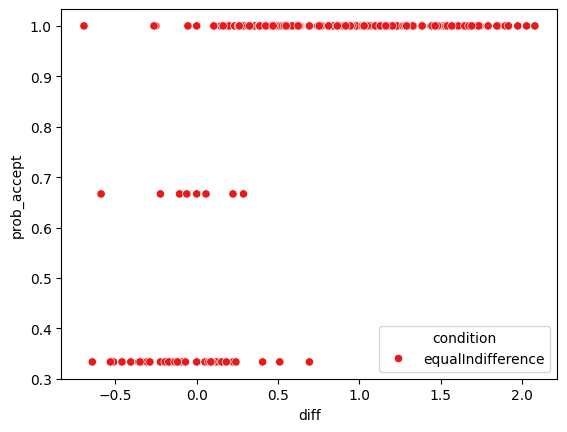

In [35]:
sns.scatterplot(sub_data, x="diff", y="prob_accept", hue="condition", palette="Set1")

In [21]:
for run in sub_data.run.unique():
    run_data = sub_data.query("run == @run")
    run_data = run_data.query("stim_type == 'face'")

    fig, ax = plt.subplots()
    ax.plot(run_data['RT'], run_data['accuracy'], 'o')
    ax.set_title(f'Sub 3 Run {run}')
    ax.set_xlabel('RT')
    ax.set_ylabel('Accuracy')
    plt.show()

,sub,run,condition,gain,loss,RT,accept,response_int,participant_response,trial
512,3,1,equalIndifference,14,14,1.247,1,4.0,strongly_accept,1
513,3,1,equalIndifference,38,14,1.041,1,4.0,strongly_accept,2
514,3,1,equalIndifference,10,18,2.803,1,3.0,weakly_accept,3
515,3,1,equalIndifference,16,5,0.936,1,4.0,strongly_accept,4
516,3,1,equalIndifference,40,12,1.142,1,4.0,strongly_accept,5
...,...,...,...,...,...,...,...,...,...,...
763,3,4,equalIndifference,26,6,2.392,1,4.0,strongly_accept,252
764,3,4,equalIndifference,26,15,1.038,1,4.0,strongly_accept,253
765,3,4,equalIndifference,24,5,1.869,1,4.0,strongly_accept,254
766,3,4,equalIndifference,32,10,1.144,1,4.0,strongly_accept,255


In [19]:
# loop through rows in sub_data
contradictions = []
for index, row in sub_data.iterrows():
    # get the trial number
    trial_num = row['trial']
    response, gain, loss = row['response_int'], row["gain"], row["loss"]
    
    # Check to see if I am doing something that contradicts any of my previous choices. 
    if response == 1 or response == 2:
        num_contradictions = len(sub_data.query("trial < @trial_num & gain <= @gain & loss >= @loss & response_int > @response")) / trial_num
    elif response == 3 or response == 4:
        num_contradictions = len(sub_data.query("trial < @trial_num & gain >= @gain & loss <= @loss & response_int < @response")) / trial_num
    
    contradictions.append(num_contradictions)

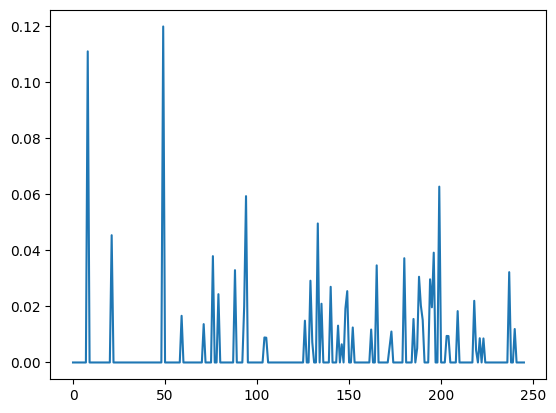

In [20]:
plt.plot(contradictions)